# Digits dataset

In [49]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

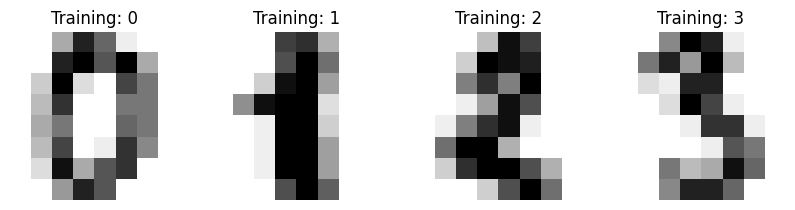

In [50]:
import matplotlib.pyplot as plt

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [51]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  ##  SVM can't handle images directly

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.75, shuffle=False)

In [52]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [53]:
metrics.accuracy_score(y_test, predicted)

0.9480712166172107

# Convolutional layers + batch training

https://stackoverflow.com/questions/65554032/understanding-convolutional-layers-shapes  

https://stackoverflow.com/questions/54727606/how-do-convolutional-layers-cnns-work-in-keras

https://stackoverflow.com/questions/73118867/how-to-understand-the-convolutional-layer-output-depth


Others: https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [55]:
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.75, shuffle=False)

## Shape of you?
print(X_train.shape)

(449, 8, 8)


In [56]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size = (5, 5))
        self.pool = nn.MaxPool2d(2, 2)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        self.drop = nn.Dropout2d(0.2)
        # self.fc1 = nn.Linear(72, 10)
        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.relu1(x)
        x = self.bn1(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.drop(x)        
        x1 = self.fc1(x)
        x = F.relu(x1)
        return x

model = Net().to(device)

tmp = torch.tensor(X_train[0:5,None,:,:], dtype=torch.float32)
print(tmp.shape)
model(tmp).shape

torch.Size([5, 1, 8, 8])


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


torch.Size([5, 10])

In [57]:
X_test = (X_test / X_train.max()) * 2 - 1
X_train = (X_train / X_train.max()) * 2 - 1

In [58]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
data_x = torch.tensor(X_train[:,None,:,:], dtype=torch.float32)
data_y = torch.tensor(y_train, dtype=torch.float32)
data_x_test = torch.tensor(X_test[:,None,:,:], dtype=torch.float32)
data_y_test = torch.tensor(y_test, dtype=torch.float32)

from math import floor

batch_size = 8
num_data_points = len(y_train)
num_batches = floor(num_data_points/batch_size)


In [60]:
for epoch in range(250):
  l = np.array([])
  print(epoch)

  # rearrange the data each epoch
  permute = torch.randperm(num_data_points)
  data_x = data_x[permute]
  data_y = data_y[permute].to(torch.long)
  
  # manually loop through the batches
  for batch_idx in range(num_batches):
    
    # here index is a vector of the indices in the batch
    index = range( (batch_size*(batch_idx-1) + 1), (batch_idx*batch_size))
    x = data_x[index].to(device)
    y = data_y[index].to(device)

    optimizer.zero_grad()
    output = model(x)

    loss = F.cross_entropy(output, y)
    loss.backward()
    optimizer.step()
    l = np.append(l, loss.item())
    # print(loss.item())
    #print(batch_idx + "-th batch done")

  torch.save(model, "current_model_images.rds")  
  print("Loss at epoch", epoch, np.mean(l))


0
Loss at epoch 0 2.205148539372853
1
Loss at epoch 1 1.8393942245415278
2
Loss at epoch 2 1.5414499140211515
3
Loss at epoch 3 1.3796126352889198
4
Loss at epoch 4 1.25113347651703
5
Loss at epoch 5 1.1934088612241405
6
Loss at epoch 6 1.002063120582274
7
Loss at epoch 7 0.9000615054475409
8
Loss at epoch 8 0.8569802945213658
9
Loss at epoch 9 0.8414072242698499
10
Loss at epoch 10 0.8299483354868633
11
Loss at epoch 11 0.7554250710776874
12
Loss at epoch 12 0.7498477384714144
13
Loss at epoch 13 0.707313253544271
14
Loss at epoch 14 0.6363314880457308
15
Loss at epoch 15 0.6978622560522386
16
Loss at epoch 16 0.6404727366087692
17
Loss at epoch 17 0.6509126256486135
18
Loss at epoch 18 0.6807012546009251
19
Loss at epoch 19 0.6368024532483625
20
Loss at epoch 20 0.662299588289378
21
Loss at epoch 21 0.6313661382799702
22
Loss at epoch 22 0.6144175011598106
23
Loss at epoch 23 0.6424657321601573
24
Loss at epoch 24 0.6091074158903211
25
Loss at epoch 25 0.6006227674494896
26
Loss at e

(This space is intentionally left blank)

# **Pre trained model**

In [61]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.models import regnet_y_16gf, RegNet_Y_16GF_Weights
import torch

In [62]:
from torchvision.models import list_models
all_models = list_models()
# print(all_models)
## https://pytorch.org/vision/stable/models.html

### Take one model

In [63]:
# Step 1: Initialize model with the best available weights

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
# print(model)

# weights = ResNet101_Weights.DEFAULT
# model = resnet101(weights=weights)
# # print(model)


# weights = RegNet_Y_16GF_Weights.IMAGENET1K_SWAG_E2E_V1
# model = regnet_y_16gf(weights=weights)
# # print(model)


# To have smaller sized model, you can check the quantized models also.

## Using the pre-trained models

Before using the pre-trained models, one must preprocess the image (resize with right resolution/interpolation, apply inference transforms, rescale the values etc). There is no standard way to do this as it depends on how a given model was trained. It can vary across model families, variants or even weight versions. Using the correct preprocessing method is critical and failing to do so may lead to decreased accuracy or incorrect outputs.

All the necessary information for the inference transforms of each pre-trained model is provided on its *weights documentation*. To simplify inference, TorchVision bundles the necessary preprocessing transforms into each model weight. These are accessible via the weight.transforms attribute.

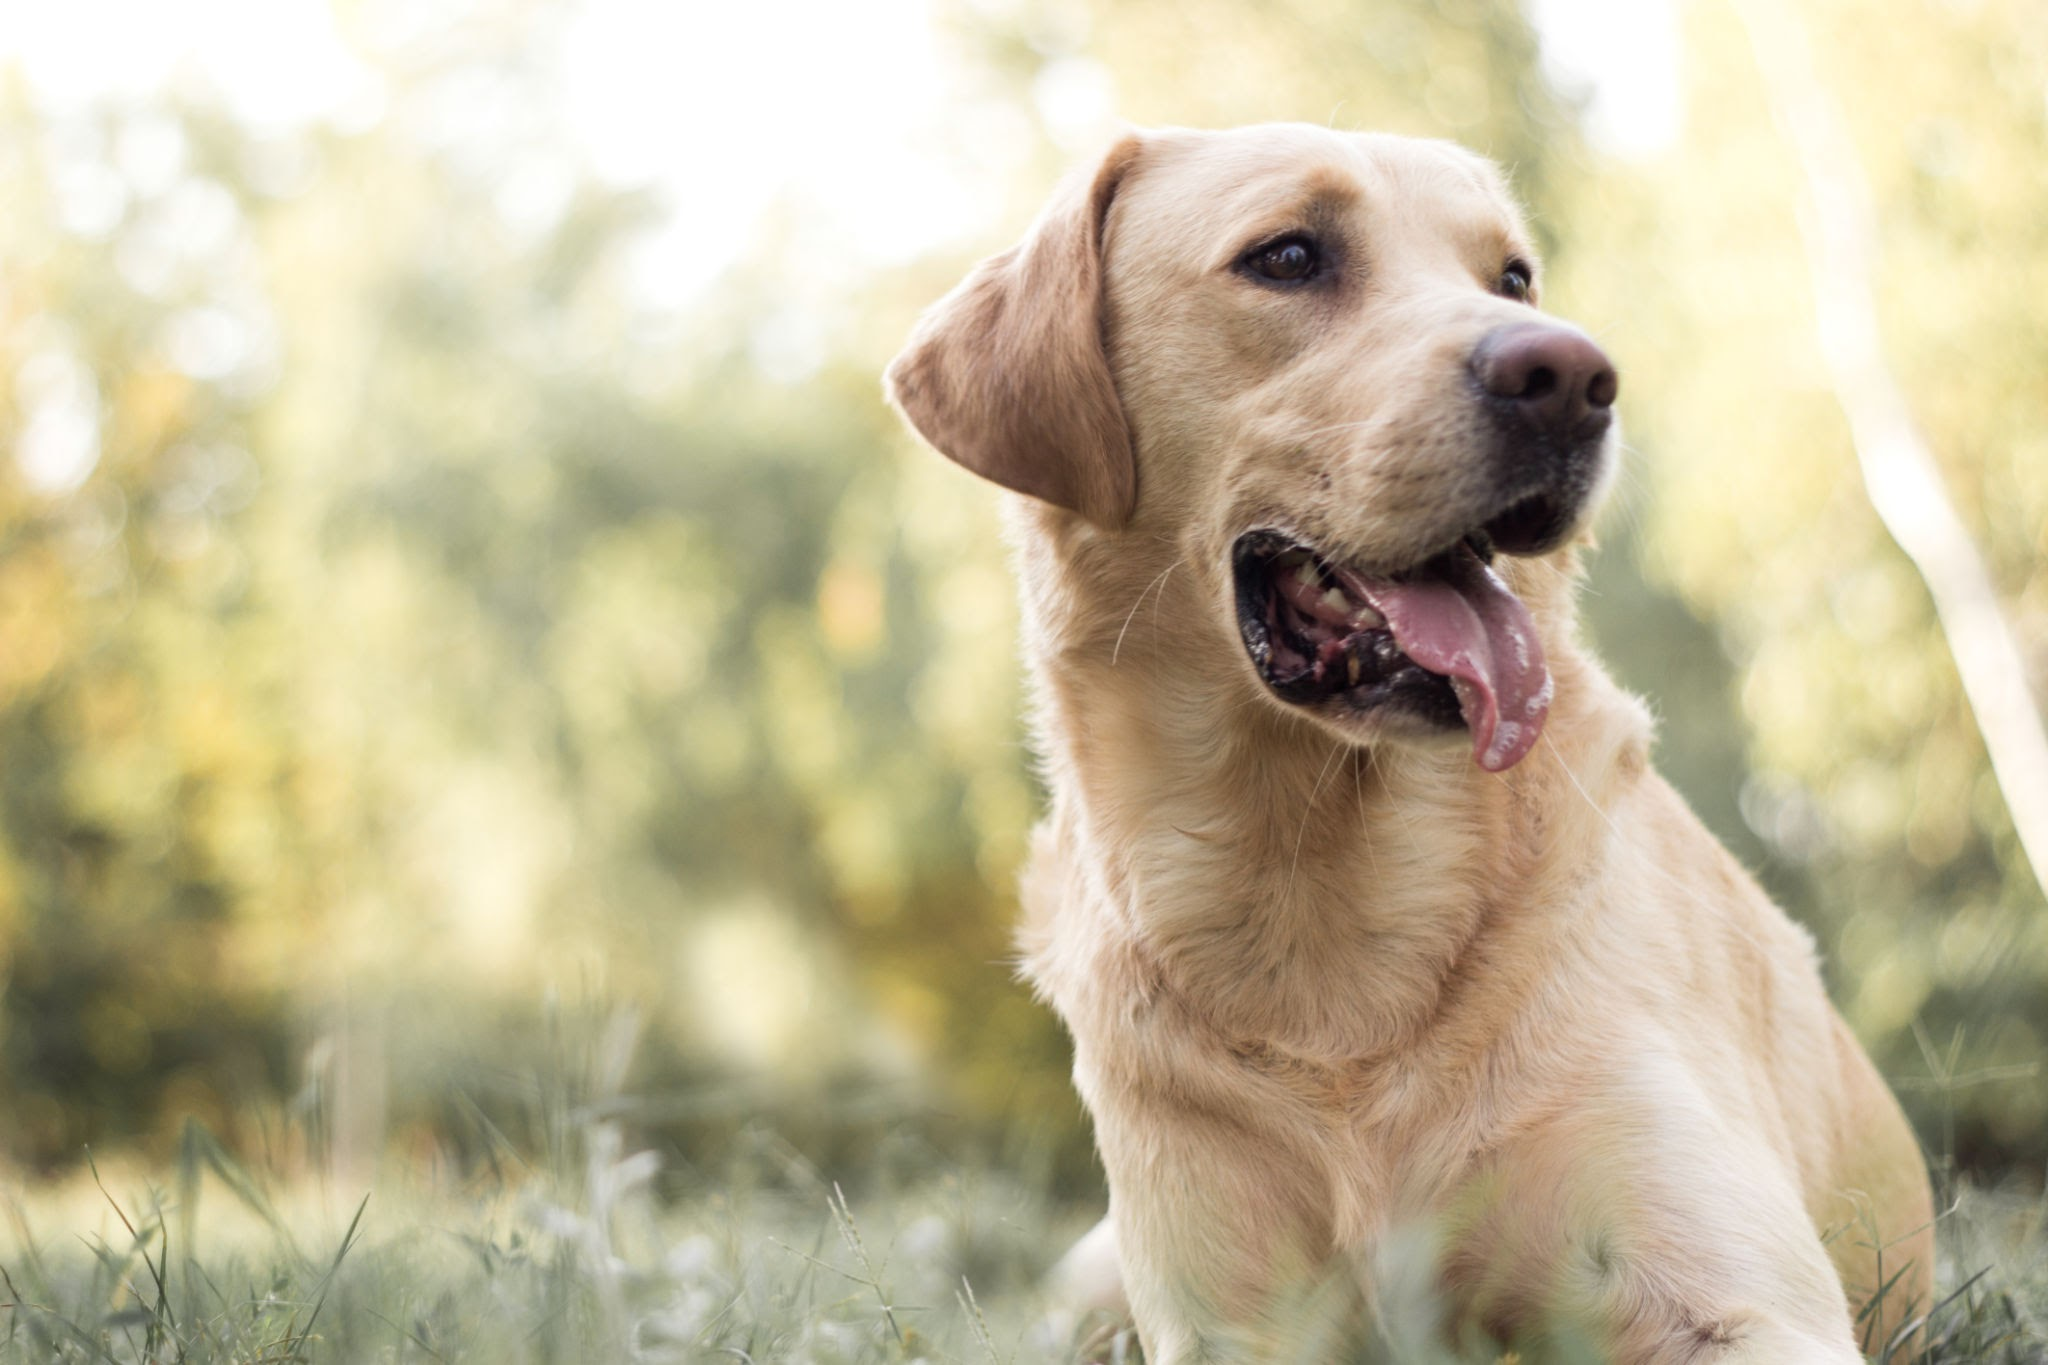

In [64]:
## Read one sample image
from torchvision.io import read_image
# img = read_image("puppy.jpg")  ## See https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb also
img = read_image("strawberry.jpg")
img = read_image("labrador.jpeg")

from IPython.display import Image
Image(filename='labrador.jpeg')

In [65]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

In [66]:
# Step 3: Apply inference preprocessing transforms

# preprocess = transforms.Compose([
# #     transforms.Resize((512, 256)),
# #     transforms.RandomResizedCrop((512, 256)),
#     transforms.RandomResizedCrop((256, 256), scale=(0.8, 1.0)),
# #     transforms.CenterCrop(224),
# #     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

batch = preprocess(img).unsqueeze(0)
print(batch.shape)


torch.Size([1, 3, 224, 224])


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [67]:
# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

American Staffordshire terrier: 0.3%


In [68]:
out = model(batch)

# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels = weights.meta["categories"]
[(labels[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('American Staffordshire terrier', 0.3294234275817871),
 ('Rhodesian ridgeback', 0.3293584883213043),
 ('Labrador retriever', 0.2472108006477356),
 ('Staffordshire bullterrier', 0.22564458847045898),
 ('German short-haired pointer', 0.21426109969615936),
 ('vizsla', 0.2072209268808365),
 ('bluetick', 0.19651857018470764),
 ('redbone', 0.19640743732452393),
 ('Rottweiler', 0.19335004687309265),
 ('Border terrier', 0.1933383047580719)]

Something wrong? Change your code according to this: 
https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

Can also see https://pytorch.org/vision/stable/transforms.html

https://pytorch.org/vision/stable/models.html


## Fine tune models

You can take a pre trained model first, which already have internal filters' some of which can check the lines/edges/shapes like circle, color combinations and other things. 

Then you can possibly change the last layer or add another layer to the last layer and train data in **YOUR SETUP** with **YOUR DATA** with a possibly small learning rate. This is called fine tuning of a model. 

In [69]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [70]:
model.fc = nn.Linear(2048, 10)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Instance Segmentation

https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html#instance-seg-output